In [183]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [185]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/komentar.csv')

In [186]:
print(df.head())

   score                                            content
0      5  Sangat membantu untuk aplikasi dan fitur maps ...
1      1  ini aplikasi sedang menyingkirkan mitra lamany...
2      3  Sangat membantu tp tolong dong knp klo cs yg c...
3      4  Saat anter penumpang, sdh d ksi jalur/jaln yg ...
4      1  Aplikasi yg buat driver timpang ada yg udah 20...


In [187]:
df = df.drop(['score'], axis=1)

In [188]:
print(df.head())

                                             content
0  Sangat membantu untuk aplikasi dan fitur maps ...
1  ini aplikasi sedang menyingkirkan mitra lamany...
2  Sangat membantu tp tolong dong knp klo cs yg c...
3  Saat anter penumpang, sdh d ksi jalur/jaln yg ...
4  Aplikasi yg buat driver timpang ada yg udah 20...


In [189]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag","allcaps","elongated","repeated",'emphasis','censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.8/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


/usr/local/lib/python3.8/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [191]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

In [192]:
i = 0
final_string = []
s = ""
for text in df['content'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [193]:
df["step01"] = final_string

In [194]:
df.head()

,content,step01
0,Sangat membantu untuk aplikasi dan fitur maps ...,sangat membantu untuk aplikasi dan fitur maps ...
1,ini aplikasi sedang menyingkirkan mitra lamany...,ini aplikasi sedang menyingkirkan mitra lamany...
2,Sangat membantu tp tolong dong knp klo cs yg c...,sangat membantu tp tolong dong knp klo cs yg c...
3,"Saat anter penumpang, sdh d ksi jalur/jaln yg ...",saat anter penumpang sdh ksi jalur jaln yg tdk...
4,Aplikasi yg buat driver timpang ada yg udah 20...,aplikasi yg buat driver timpang ada yg udah nu...


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   step01   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [196]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [197]:
df_new = df[~df.isin(df_hapus)].dropna()

In [198]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   step01   1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [199]:
# token
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [200]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [201]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [202]:
df_new.head(10)

,content,step01,tokens
0,Sangat membantu untuk aplikasi dan fitur maps ...,sangat membantu untuk aplikasi dan fitur maps ...,"[sangat, membantu, untuk, aplikasi, dan, fitur..."
1,ini aplikasi sedang menyingkirkan mitra lamany...,ini aplikasi sedang menyingkirkan mitra lamany...,"[ini, aplikasi, sedang, menyingkirkan, mitra, ..."
2,Sangat membantu tp tolong dong knp klo cs yg c...,sangat membantu tp tolong dong knp klo cs yg c...,"[sangat, membantu, tp, tolong, dong, knp, klo,..."
3,"Saat anter penumpang, sdh d ksi jalur/jaln yg ...",saat anter penumpang sdh ksi jalur jaln yg tdk...,"[saat, anter, penumpang, sdh, ksi, jalur, jaln..."
4,Aplikasi yg buat driver timpang ada yg udah 20...,aplikasi yg buat driver timpang ada yg udah nu...,"[aplikasi, yg, buat, driver, timpang, ada, yg,..."
5,Update terbaru masih aja Aplikasi sering kelua...,update terbaru masih aja aplikasi sering kelua...,"[update, terbaru, masih, aja, aplikasi, sering..."
6,"Driver kena orderan fiktif tidak di ganti, jik...",driver kena orderan fiktif tidak di ganti jika...,"[driver, kena, orderan, fiktif, tidak, di, gan..."
7,1. Nada dering aplikasi jangan mengikuti nada ...,number nada dering aplikasi jangan mengikuti n...,"[number, nada, dering, aplikasi, jangan, mengi..."
8,"Baterai jadi lebih boros, cepat panas, titik k...",baterai jadi lebih boros cepat panas titik kad...,"[baterai, jadi, lebih, boros, cepat, panas, ti..."
9,Aplikasi yang jelas2 sudah off bid tiba2 masuk...,aplikasi yang jelas2 sudah off bid tiba2 masuk...,"[aplikasi, yang, jelas2, sudah, off, bid, tiba..."


In [203]:
normalized_word = pd.read_excel("/content/drive/My Drive/Colab Notebooks/kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_new['tokens_perbaikan'] = df_new['tokens'].apply(normalized_term)

In [204]:
df_new.head()

,content,step01,tokens,tokens_perbaikan
0,Sangat membantu untuk aplikasi dan fitur maps ...,sangat membantu untuk aplikasi dan fitur maps ...,"[sangat, membantu, untuk, aplikasi, dan, fitur...","[sangat, membantu, untuk, aplikasi, dan, fitur..."
1,ini aplikasi sedang menyingkirkan mitra lamany...,ini aplikasi sedang menyingkirkan mitra lamany...,"[ini, aplikasi, sedang, menyingkirkan, mitra, ...","[ini, aplikasi, sedang, menyingkirkan, mitra, ..."
2,Sangat membantu tp tolong dong knp klo cs yg c...,sangat membantu tp tolong dong knp klo cs yg c...,"[sangat, membantu, tp, tolong, dong, knp, klo,...","[sangat, membantu, tapi, tolong, dong, mengapa..."
3,"Saat anter penumpang, sdh d ksi jalur/jaln yg ...",saat anter penumpang sdh ksi jalur jaln yg tdk...,"[saat, anter, penumpang, sdh, ksi, jalur, jaln...","[saat, anter, penumpang, sudah, ksi, jalur, ja..."
4,Aplikasi yg buat driver timpang ada yg udah 20...,aplikasi yg buat driver timpang ada yg udah nu...,"[aplikasi, yg, buat, driver, timpang, ada, yg,...","[aplikasi, yang, buat, driver, timpang, ada, y..."


In [205]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [206]:
stopword = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

df_new['Stop_removal'] = df_new['tokens_perbaikan'].apply(lambda x: remove_stopwords(x))
df_new

,content,step01,tokens,tokens_perbaikan,Stop_removal
0,Sangat membantu untuk aplikasi dan fitur maps ...,sangat membantu untuk aplikasi dan fitur maps ...,"[sangat, membantu, untuk, aplikasi, dan, fitur...","[sangat, membantu, untuk, aplikasi, dan, fitur...","[membantu, aplikasi, fitur, maps, nya, semoga,..."
1,ini aplikasi sedang menyingkirkan mitra lamany...,ini aplikasi sedang menyingkirkan mitra lamany...,"[ini, aplikasi, sedang, menyingkirkan, mitra, ...","[ini, aplikasi, sedang, menyingkirkan, mitra, ...","[aplikasi, menyingkirkan, mitra, halus, ordera..."
2,Sangat membantu tp tolong dong knp klo cs yg c...,sangat membantu tp tolong dong knp klo cs yg c...,"[sangat, membantu, tp, tolong, dong, knp, klo,...","[sangat, membantu, tapi, tolong, dong, mengapa...","[membantu, tolong, cs, cancel, perfoma, turun,..."
3,"Saat anter penumpang, sdh d ksi jalur/jaln yg ...",saat anter penumpang sdh ksi jalur jaln yg tdk...,"[saat, anter, penumpang, sdh, ksi, jalur, jaln...","[saat, anter, penumpang, sudah, ksi, jalur, ja...","[anter, penumpang, ksi, jalur, jaln, macetnya,..."
4,Aplikasi yg buat driver timpang ada yg udah 20...,aplikasi yg buat driver timpang ada yg udah nu...,"[aplikasi, yg, buat, driver, timpang, ada, yg,...","[aplikasi, yang, buat, driver, timpang, ada, y...","[aplikasi, driver, timpang, number, number, or..."
...,...,...,...,...,...
995,"Aplikasi sering logout sendiri , hp jadi serin...",aplikasi sering logout sendiri hp jadi sering ...,"[aplikasi, sering, logout, sendiri, hp, jadi, ...","[aplikasi, sering, logout, sendiri, hp, jadi, ...","[aplikasi, logout, hp, restart, pickup, cocok,..."
996,Overall fungsi aplikasi bagus hanya 1 yang san...,overall fungsi aplikasi bagus hanya number yan...,"[overall, fungsi, aplikasi, bagus, hanya, numb...","[overall, fungsi, aplikasi, bagus, hanya, numb...","[overall, fungsi, aplikasi, bagus, number, jel..."
997,Tampilan baru ribet dah.....enak kaya dulu tam...,tampilan baru ribet dah repeated enak kaya dul...,"[tampilan, baru, ribet, dah, repeated, enak, k...","[tampilan, baru, rumit, sudah, repeated, enak,...","[tampilan, rumit, repeated, enak, kaya, tampil..."
998,"Aplikasi sudah bagus, sayangnya tombol penyele...",aplikasi sudah bagus sayangnya tombol penyeles...,"[aplikasi, sudah, bagus, sayangnya, tombol, pe...","[aplikasi, sudah, bagus, sayangnya, tombol, pe...","[aplikasi, bagus, sayangnya, tombol, penyelesa..."


In [207]:
i=0
final_string_tokens = []
for text in df_new['Stop_removal'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [208]:
df_new["step02"] = final_string_tokens

In [209]:
df_new.head()

,content,step01,tokens,tokens_perbaikan,Stop_removal,step02
0,Sangat membantu untuk aplikasi dan fitur maps ...,sangat membantu untuk aplikasi dan fitur maps ...,"[sangat, membantu, untuk, aplikasi, dan, fitur...","[sangat, membantu, untuk, aplikasi, dan, fitur...","[membantu, aplikasi, fitur, maps, nya, semoga,...",membantu aplikasi fitur maps nya semoga kedepa...
1,ini aplikasi sedang menyingkirkan mitra lamany...,ini aplikasi sedang menyingkirkan mitra lamany...,"[ini, aplikasi, sedang, menyingkirkan, mitra, ...","[ini, aplikasi, sedang, menyingkirkan, mitra, ...","[aplikasi, menyingkirkan, mitra, halus, ordera...",aplikasi menyingkirkan mitra halus orderan har...
2,Sangat membantu tp tolong dong knp klo cs yg c...,sangat membantu tp tolong dong knp klo cs yg c...,"[sangat, membantu, tp, tolong, dong, knp, klo,...","[sangat, membantu, tapi, tolong, dong, mengapa...","[membantu, tolong, cs, cancel, perfoma, turun,...",membantu tolong cs cancel perfoma turun tolong...
3,"Saat anter penumpang, sdh d ksi jalur/jaln yg ...",saat anter penumpang sdh ksi jalur jaln yg tdk...,"[saat, anter, penumpang, sdh, ksi, jalur, jaln...","[saat, anter, penumpang, sudah, ksi, jalur, ja...","[anter, penumpang, ksi, jalur, jaln, macetnya,...",anter penumpang ksi jalur jaln macetnya biru m...
4,Aplikasi yg buat driver timpang ada yg udah 20...,aplikasi yg buat driver timpang ada yg udah nu...,"[aplikasi, yg, buat, driver, timpang, ada, yg,...","[aplikasi, yang, buat, driver, timpang, ada, y...","[aplikasi, driver, timpang, number, number, or...",aplikasi driver timpang number number orderan ...


In [210]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [212]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    s = (stemmer.stem(sentence))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [213]:
df_new["ProcessedText"] = final_string

In [214]:
df_new.head(10)

,content,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,Sangat membantu untuk aplikasi dan fitur maps ...,sangat membantu untuk aplikasi dan fitur maps ...,"[sangat, membantu, untuk, aplikasi, dan, fitur...","[sangat, membantu, untuk, aplikasi, dan, fitur...","[membantu, aplikasi, fitur, maps, nya, semoga,...",membantu aplikasi fitur maps nya semoga kedepa...,bantu aplikasi fitur maps nya moga depan
1,ini aplikasi sedang menyingkirkan mitra lamany...,ini aplikasi sedang menyingkirkan mitra lamany...,"[ini, aplikasi, sedang, menyingkirkan, mitra, ...","[ini, aplikasi, sedang, menyingkirkan, mitra, ...","[aplikasi, menyingkirkan, mitra, halus, ordera...",aplikasi menyingkirkan mitra halus orderan har...,aplikasi singkir mitra halus order hari mitra ...
2,Sangat membantu tp tolong dong knp klo cs yg c...,sangat membantu tp tolong dong knp klo cs yg c...,"[sangat, membantu, tp, tolong, dong, knp, klo,...","[sangat, membantu, tapi, tolong, dong, mengapa...","[membantu, tolong, cs, cancel, perfoma, turun,...",membantu tolong cs cancel perfoma turun tolong...,bantu tolong cs cancel perfoma turun tolong be...
3,"Saat anter penumpang, sdh d ksi jalur/jaln yg ...",saat anter penumpang sdh ksi jalur jaln yg tdk...,"[saat, anter, penumpang, sdh, ksi, jalur, jaln...","[saat, anter, penumpang, sudah, ksi, jalur, ja...","[anter, penumpang, ksi, jalur, jaln, macetnya,...",anter penumpang ksi jalur jaln macetnya biru m...,anter tumpang ksi jalur jaln macet biru maps c...
4,Aplikasi yg buat driver timpang ada yg udah 20...,aplikasi yg buat driver timpang ada yg udah nu...,"[aplikasi, yg, buat, driver, timpang, ada, yg,...","[aplikasi, yang, buat, driver, timpang, ada, y...","[aplikasi, driver, timpang, number, number, or...",aplikasi driver timpang number number orderan ...,aplikasi driver timpang number number order sa...
5,Update terbaru masih aja Aplikasi sering kelua...,update terbaru masih aja aplikasi sering kelua...,"[update, terbaru, masih, aja, aplikasi, sering...","[update, terbaru, masih, saja, aplikasi, serin...","[update, terbaru, aplikasi, update, prasangka,...",update terbaru aplikasi update prasangka sepi ...,update baru aplikasi update prasangka sepi tau...
6,"Driver kena orderan fiktif tidak di ganti, jik...",driver kena orderan fiktif tidak di ganti jika...,"[driver, kena, orderan, fiktif, tidak, di, gan...","[driver, kena, orderan, fiktif, tidak, di, gan...","[driver, kena, orderan, fiktif, ganti, aturan,...",driver kena orderan fiktif ganti aturan main m...,driver kena order fiktif ganti atur main batas...
7,1. Nada dering aplikasi jangan mengikuti nada ...,number nada dering aplikasi jangan mengikuti n...,"[number, nada, dering, aplikasi, jangan, mengi...","[number, nada, dering, aplikasi, jangan, mengi...","[number, nada, dering, aplikasi, mengikuti, na...",number nada dering aplikasi mengikuti nada der...,number nada dering aplikasi ikut nada dering p...
8,"Baterai jadi lebih boros, cepat panas, titik k...",baterai jadi lebih boros cepat panas titik kad...,"[baterai, jadi, lebih, boros, cepat, panas, ti...","[baterai, jadi, lebih, boros, cepat, panas, ti...","[baterai, boros, cepat, panas, titik, kadang]",baterai boros cepat panas titik kadang,baterai boros cepat panas titik kadang
9,Aplikasi yang jelas2 sudah off bid tiba2 masuk...,aplikasi yang jelas2 sudah off bid tiba2 masuk...,"[aplikasi, yang, jelas2, sudah, off, bid, tiba...","[aplikasi, yang, jelas2, sudah, off, bid, tiba...","[aplikasi, jelas2, off, bid, tiba2, masuk, ord...",aplikasi jelas2 off bid tiba2 masuk orderan to...,aplikasi jelas2 off bid tiba2 masuk order tolo...


In [215]:
df_new.to_csv('/content/drive/My Drive/Colab Notebooks/clean_dataset_part01.csv',sep=";")

In [216]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/clean_dataset_part01.csv',sep=";")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [217]:
sentiments = SentimentIntensityAnalyzer()
data["1"] = [sentiments.polarity_scores(i)["pos"] for i in data["ProcessedText"]]
data["-1"] = [sentiments.polarity_scores(i)["neg"] for i in data["ProcessedText"]]
data["0"] = [sentiments.polarity_scores(i)["neu"] for i in data["ProcessedText"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["ProcessedText"]]
data.head()

,Unnamed: 0,content,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText,1,-1,0,Compound
0,0,Sangat membantu untuk aplikasi dan fitur maps ...,sangat membantu untuk aplikasi dan fitur maps ...,"['sangat', 'membantu', 'untuk', 'aplikasi', 'd...","['sangat', 'membantu', 'untuk', 'aplikasi', 'd...","['membantu', 'aplikasi', 'fitur', 'maps', 'nya...",membantu aplikasi fitur maps nya semoga kedepa...,bantu aplikasi fitur maps nya moga depan,0.000,0.000,1.000,0.0000
1,1,ini aplikasi sedang menyingkirkan mitra lamany...,ini aplikasi sedang menyingkirkan mitra lamany...,"['ini', 'aplikasi', 'sedang', 'menyingkirkan',...","['ini', 'aplikasi', 'sedang', 'menyingkirkan',...","['aplikasi', 'menyingkirkan', 'mitra', 'halus'...",aplikasi menyingkirkan mitra halus orderan har...,aplikasi singkir mitra halus order hari mitra ...,0.000,0.000,1.000,0.0000
2,2,Sangat membantu tp tolong dong knp klo cs yg c...,sangat membantu tp tolong dong knp klo cs yg c...,"['sangat', 'membantu', 'tp', 'tolong', 'dong',...","['sangat', 'membantu', 'tapi', 'tolong', 'dong...","['membantu', 'tolong', 'cs', 'cancel', 'perfom...",membantu tolong cs cancel perfoma turun tolong...,bantu tolong cs cancel perfoma turun tolong be...,0.000,0.182,0.818,-0.2500
3,3,"Saat anter penumpang, sdh d ksi jalur/jaln yg ...",saat anter penumpang sdh ksi jalur jaln yg tdk...,"['saat', 'anter', 'penumpang', 'sdh', 'ksi', '...","['saat', 'anter', 'penumpang', 'sudah', 'ksi',...","['anter', 'penumpang', 'ksi', 'jalur', 'jaln',...",anter penumpang ksi jalur jaln macetnya biru m...,anter tumpang ksi jalur jaln macet biru maps c...,0.000,0.000,1.000,0.0000
4,4,Aplikasi yg buat driver timpang ada yg udah 20...,aplikasi yg buat driver timpang ada yg udah nu...,"['aplikasi', 'yg', 'buat', 'driver', 'timpang'...","['aplikasi', 'yang', 'buat', 'driver', 'timpan...","['aplikasi', 'driver', 'timpang', 'number', 'n...",aplikasi driver timpang number number orderan ...,aplikasi driver timpang number number order sa...,0.245,0.000,0.755,0.1531


In [218]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('1')
    elif i <= -0.05 :
        sentiment.append('-1')
    else:
        sentiment.append('0')
data["Sentiment"] = sentiment
data.head()

,Unnamed: 0,content,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText,1,-1,0,Compound,Sentiment
0,0,Sangat membantu untuk aplikasi dan fitur maps ...,sangat membantu untuk aplikasi dan fitur maps ...,"['sangat', 'membantu', 'untuk', 'aplikasi', 'd...","['sangat', 'membantu', 'untuk', 'aplikasi', 'd...","['membantu', 'aplikasi', 'fitur', 'maps', 'nya...",membantu aplikasi fitur maps nya semoga kedepa...,bantu aplikasi fitur maps nya moga depan,0.000,0.000,1.000,0.0000,0
1,1,ini aplikasi sedang menyingkirkan mitra lamany...,ini aplikasi sedang menyingkirkan mitra lamany...,"['ini', 'aplikasi', 'sedang', 'menyingkirkan',...","['ini', 'aplikasi', 'sedang', 'menyingkirkan',...","['aplikasi', 'menyingkirkan', 'mitra', 'halus'...",aplikasi menyingkirkan mitra halus orderan har...,aplikasi singkir mitra halus order hari mitra ...,0.000,0.000,1.000,0.0000,0
2,2,Sangat membantu tp tolong dong knp klo cs yg c...,sangat membantu tp tolong dong knp klo cs yg c...,"['sangat', 'membantu', 'tp', 'tolong', 'dong',...","['sangat', 'membantu', 'tapi', 'tolong', 'dong...","['membantu', 'tolong', 'cs', 'cancel', 'perfom...",membantu tolong cs cancel perfoma turun tolong...,bantu tolong cs cancel perfoma turun tolong be...,0.000,0.182,0.818,-0.2500,-1
3,3,"Saat anter penumpang, sdh d ksi jalur/jaln yg ...",saat anter penumpang sdh ksi jalur jaln yg tdk...,"['saat', 'anter', 'penumpang', 'sdh', 'ksi', '...","['saat', 'anter', 'penumpang', 'sudah', 'ksi',...","['anter', 'penumpang', 'ksi', 'jalur', 'jaln',...",anter penumpang ksi jalur jaln macetnya biru m...,anter tumpang ksi jalur jaln macet biru maps c...,0.000,0.000,1.000,0.0000,0
4,4,Aplikasi yg buat driver timpang ada yg udah 20...,aplikasi yg buat driver timpang ada yg udah nu...,"['aplikasi', 'yg', 'buat', 'driver', 'timpang'...","['aplikasi', 'yang', 'buat', 'driver', 'timpan...","['aplikasi', 'driver', 'timpang', 'number', 'n...",aplikasi driver timpang number number orderan ...,aplikasi driver timpang number number order sa...,0.245,0.000,0.755,0.1531,1


In [219]:
print(data["Sentiment"].value_counts())

0     567
1     305
-1    128
Name: Sentiment, dtype: int64


In [220]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/Labeling_data.csv',sep=";")

In [221]:
import pandas as pd
import numpy as np

In [222]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labeling_data.csv',sep=";")

In [223]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [224]:
dataset_feature.head()

0             bantu aplikasi fitur maps nya moga depan
1    aplikasi singkir mitra halus order hari mitra ...
2    bantu tolong cs cancel perfoma turun tolong be...
3    anter tumpang ksi jalur jaln macet biru maps c...
4    aplikasi driver timpang number number order sa...
Name: ProcessedText, dtype: object

In [225]:
dataset_label = dataset['Sentiment']

In [226]:
dataset_label.head()

0    0
1    0
2   -1
3    0
4    1
Name: Sentiment, dtype: int64

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


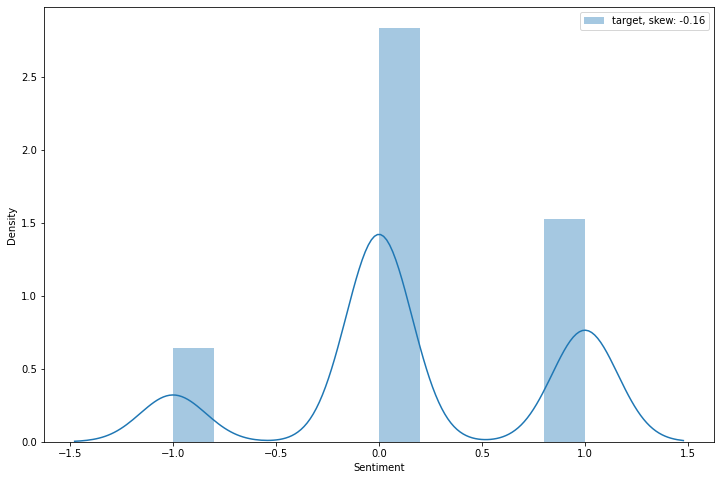

In [228]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [229]:
dataset_label.value_counts()

 0    567
 1    305
-1    128
Name: Sentiment, dtype: int64

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [231]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.2, random_state=2023)

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer()

In [233]:
from sklearn.naive_bayes import MultinomialNB

In [234]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [235]:
parameters_nb = { 
               'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
               #'tfidf__use_idf': (True, False),
               'model__alpha': (0, 1, 1e-2, 1e-3)
}

In [236]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv =3, n_jobs=-1)

In [237]:
classifier_nb.fit(train_x, train_label.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0, 1, 0.01, 0.001),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [238]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.675


In [239]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.675


In [240]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.676007866273353


In [241]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  1.0
F1 Test set:  0.6670802139037433


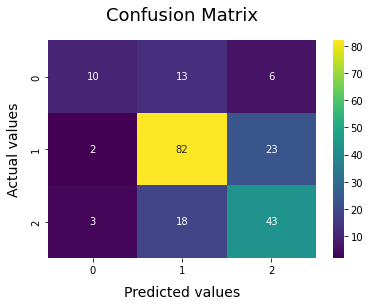

In [242]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [243]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('model', MultinomialNB(alpha=0.01))])

In [244]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 0.01
tfidf__ngram_range: (1, 3)


In [245]:
models = [        
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test)
         ]

In [246]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.675


In [247]:
models_comparison = [                        
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test)                      
                    ]

In [248]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.675,0.675,0.676008,0.66708


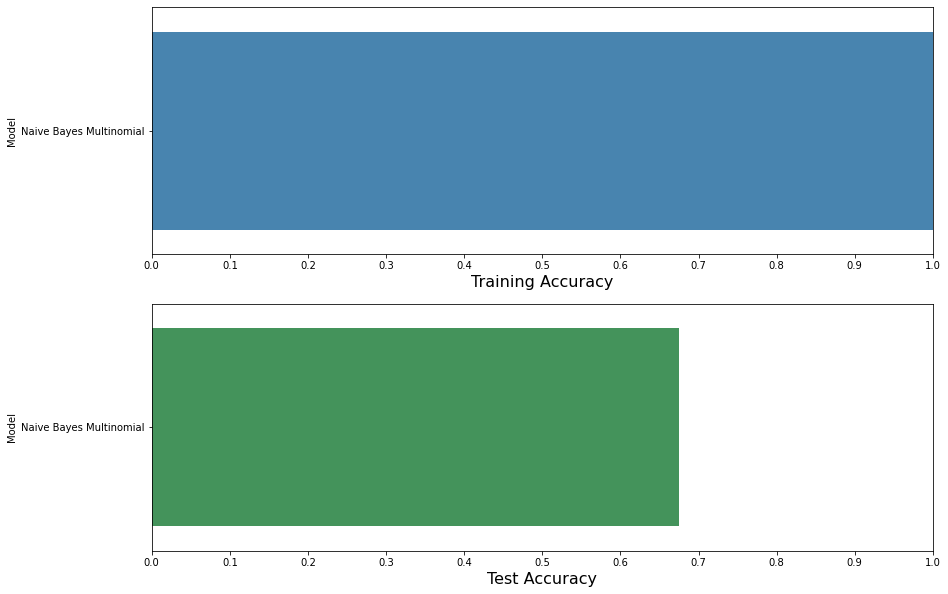

In [249]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [250]:
import joblib
# save the model to disk
joblib.dump(classifier_nb.best_estimator_, '/content/drive/My Drive/Colab Notebooks/classifier_nb.best_estimator_.sav', compress=1)

['/content/drive/My Drive/Colab Notebooks/classifier_nb.best_estimator_.sav']